In [65]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
words=open('toy.text','r',encoding='utf-8').read().splitlines()

In [67]:
chars=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
vocab_size=len(itos)
print(vocab_size)
print(itos)

410
{1: '—', 2: '‘', 3: '’', 4: '“', 5: '”', 6: '。', 7: '一', 8: '七', 9: '万', 10: '丈', 11: '上', 12: '下', 13: '不', 14: '且', 15: '世', 16: '业', 17: '两', 18: '丧', 19: '个', 20: '中', 21: '为', 22: '举', 23: '久', 24: '么', 25: '之', 26: '乏', 27: '九', 28: '也', 29: '习', 30: '买', 31: '了', 32: '事', 33: '二', 34: '于', 35: '五', 36: '些', 37: '亲', 38: '人', 39: '什', 40: '仆', 41: '仍', 42: '他', 43: '以', 44: '们', 45: '件', 46: '任', 47: '会', 48: '传', 49: '估', 50: '似', 51: '但', 52: '体', 53: '何', 54: '余', 55: '你', 56: '例', 57: '便', 58: '促', 59: '信', 60: '做', 61: '儿', 62: '先', 63: '八', 64: '六', 65: '关', 66: '养', 67: '再', 68: '凉', 69: '凌', 70: '几', 71: '凭', 72: '出', 73: '击', 74: '分', 75: '则', 76: '刚', 77: '初', 78: '到', 79: '前', 80: '力', 81: '务', 82: '匙', 83: '医', 84: '十', 85: '千', 86: '半', 87: '单', 88: '卜', 89: '卡', 90: '即', 91: '却', 92: '厅', 93: '原', 94: '去', 95: '又', 96: '双', 97: '发', 98: '口', 99: '另', 100: '叩', 101: '只', 102: '叮', 103: '可', 104: '右', 105: '吃', 106: '各', 107: '合', 108: '吉', 109: '同', 110: '名', 111

In [68]:
import re
with open('toy.text', 'r', encoding='utf-8') as file:
    text = file.read()
# 根据符号划分成字符串，去除换行符
symbols = ['。', '，', '；', '！', '？', '、', '：', '“', '”', '‘', '’', '（', '）']
for symbol in symbols:
    text = text.replace(symbol + '\n', symbol)

# 根据符号划分成字符串，组成数组
sentences = []
current_sentence = ''
for char in text:
    if char in symbols:
           current_sentence += char
           sentences.append(current_sentence)
           current_sentence = ''
    else:
           current_sentence += char

# 打印结果
print(sentences)


['弗拉尔斯太太死于九月十六日夜里至十七日凌晨之间，', '那是星期四。', '第二天是星期五，', '早上八点就有人请我过去，', '但已无力回天，', '她死去好几个小时了。', '九点刚过几分，', '我回到家，', '用钥匙开了前门的弹簧锁，', '故意在玄关磨蹭了一会儿，', '慢吞吞地挂好帽子和薄大衣。', '初秋的清晨寒意袭人，', '幸好我颇有先见之明，', '添了衣服。', '说实话，', '我那时相当沮丧，', '忧心忡忡。', '虽然当时我不可能预见到接下来几周的风波——我绝对不会那么做——但直觉却告诉我接下来的日子会麻烦重重。', '左边的餐厅里传来叮叮的茶杯叩击声，', '还有姐姐卡洛琳短促的干咳。', '“', '是你吗，', '詹姆斯？', '”', '她喊道。', '多余一问。', '不然还能是谁？', '老实说，', '我刚才拖拖拉拉好几分钟，', '就是因为卡洛琳。', '“', '出去把事情查个清楚”', '是猫鼬家族的座右铭——这是文学家吉卜林说的。', '如果卡洛琳长出鬃毛，', '我们家可就猫鼬成灾了。', '“', '出去把事情查个清楚”', '的前两个字大可忽略，', '即便卡洛琳安坐家中，', '消息也能送上门来。', '她的诀窍我猜不透，', '但效果一目了然。', '估计她的智囊团是由村里的各路仆人和小贩们组成的。', '一旦她出门，', '目的可就不是打听消息了，', '而是散播消息。', '在这方面，', '她的天才也堪称举世无双。', '正因为她这人尽皆知的个性，', '我才犹犹豫豫，', '能拖则拖。', '关于弗拉尔斯太太之死，', '无论我向卡洛琳透露多少口风，', '不出一个半小时，', '整个村子必将传得沸沸扬扬。', '出于一名医生的职业操守，', '我自然务求谨慎，', '所以久而久之就养成了一个习惯：', '任何消息都对姐姐留一手。', '虽然她到头来照样能查个一清二楚，', '但只要过错不在我，', '我也就心安了。', '弗拉尔斯太太的丈夫一年前刚去世，', '卡洛琳始终坚信他是被妻子下毒害死的，', '却又拿不出半点真凭实据。', '我一再表明，', '弗拉尔斯先生死于习惯性酗酒引发的急性胃炎，', '可她总是嗤之以鼻。', '急性胃炎和砒霜中毒的症状不乏相似之处，', '这一点我也认

In [69]:
words=sentences
words

['弗拉尔斯太太死于九月十六日夜里至十七日凌晨之间，',
 '那是星期四。',
 '第二天是星期五，',
 '早上八点就有人请我过去，',
 '但已无力回天，',
 '她死去好几个小时了。',
 '九点刚过几分，',
 '我回到家，',
 '用钥匙开了前门的弹簧锁，',
 '故意在玄关磨蹭了一会儿，',
 '慢吞吞地挂好帽子和薄大衣。',
 '初秋的清晨寒意袭人，',
 '幸好我颇有先见之明，',
 '添了衣服。',
 '说实话，',
 '我那时相当沮丧，',
 '忧心忡忡。',
 '虽然当时我不可能预见到接下来几周的风波——我绝对不会那么做——但直觉却告诉我接下来的日子会麻烦重重。',
 '左边的餐厅里传来叮叮的茶杯叩击声，',
 '还有姐姐卡洛琳短促的干咳。',
 '“',
 '是你吗，',
 '詹姆斯？',
 '”',
 '她喊道。',
 '多余一问。',
 '不然还能是谁？',
 '老实说，',
 '我刚才拖拖拉拉好几分钟，',
 '就是因为卡洛琳。',
 '“',
 '出去把事情查个清楚”',
 '是猫鼬家族的座右铭——这是文学家吉卜林说的。',
 '如果卡洛琳长出鬃毛，',
 '我们家可就猫鼬成灾了。',
 '“',
 '出去把事情查个清楚”',
 '的前两个字大可忽略，',
 '即便卡洛琳安坐家中，',
 '消息也能送上门来。',
 '她的诀窍我猜不透，',
 '但效果一目了然。',
 '估计她的智囊团是由村里的各路仆人和小贩们组成的。',
 '一旦她出门，',
 '目的可就不是打听消息了，',
 '而是散播消息。',
 '在这方面，',
 '她的天才也堪称举世无双。',
 '正因为她这人尽皆知的个性，',
 '我才犹犹豫豫，',
 '能拖则拖。',
 '关于弗拉尔斯太太之死，',
 '无论我向卡洛琳透露多少口风，',
 '不出一个半小时，',
 '整个村子必将传得沸沸扬扬。',
 '出于一名医生的职业操守，',
 '我自然务求谨慎，',
 '所以久而久之就养成了一个习惯：',
 '任何消息都对姐姐留一手。',
 '虽然她到头来照样能查个一清二楚，',
 '但只要过错不在我，',
 '我也就心安了。',
 '弗拉尔斯太太的丈夫一年前刚去世，',
 '卡洛琳始终坚信他是被妻子下毒害死的，',
 '却又拿不出半点真凭实据。',
 '我一再表明，',
 '弗

In [70]:
#预测第九个字符
block_size=8

def build_dataset(words):
  X,Y=[],[]
  for w in words:
    
  
    context=[0]*block_size
    for ch in w+'.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
     
        context=context[1:] + [ix]
  X=torch.tensor(X)
  Y=torch.tensor(Y)
  print(X.shape,Y.shape)       
  return X,Y
     
import random
random.seed(42)
random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words))

Xtr,Ytr =build_dataset(words[:n1]) #80%
Xdev,Ydev=build_dataset(words[n1:n2])#10%
Xte,Yte=build_dataset(words[n2:])#10%


torch.Size([906, 8]) torch.Size([906])
torch.Size([99, 8]) torch.Size([99])
torch.Size([138, 8]) torch.Size([138])


In [71]:
for x,y in zip(Xtr[:20],Ytr[:20]):
    print(''.join(itos[ix.item()] for ix in x ),'--->',itos[y.item()])

........ ---> 故
.......故 ---> 意
......故意 ---> 在
.....故意在 ---> 玄
....故意在玄 ---> 关
...故意在玄关 ---> 磨
..故意在玄关磨 ---> 蹭
.故意在玄关磨蹭 ---> 了
故意在玄关磨蹭了 ---> 一
意在玄关磨蹭了一 ---> 会
在玄关磨蹭了一会 ---> 儿
玄关磨蹭了一会儿 ---> ，
关磨蹭了一会儿， ---> .
........ ---> 语
.......语 ---> 调
......语调 ---> 比
.....语调比 ---> 刚
....语调比刚 ---> 才
...语调比刚才 ---> 更
..语调比刚才更 ---> 尖


In [72]:
Xdev.shape

torch.Size([99, 8])

In [73]:
for x,y in zip(Xtr[:10],Ytr[:10]):
    
    print(x.shape,y.shape)
    

torch.Size([8]) torch.Size([])
torch.Size([8]) torch.Size([])
torch.Size([8]) torch.Size([])
torch.Size([8]) torch.Size([])
torch.Size([8]) torch.Size([])
torch.Size([8]) torch.Size([])
torch.Size([8]) torch.Size([])
torch.Size([8]) torch.Size([])
torch.Size([8]) torch.Size([])
torch.Size([8]) torch.Size([])


In [74]:
#线性
class Linear:

    def __init__(self,fan_in,fan_out,bias=True):
       self.weight=torch.randn((fan_in,fan_out),generator=g)/fan_in**0.5  #权重
       self.bias=torch.zeros(fan_out) if bias else None                   #偏差
    def __call__(self,x):
        self.out=x@self.weight
        if self.bias is not None:
          self.out+=self.bias
        return self.out
    def parameters(self):
        return [self.weight] + ([] if self.bias is None else [self.bias])

#批量标准化线性层

class BatchNormld:

    def __init__(self,dim,eps=1e-5,momentum=0.1):
        self.eps=eps
        self.momentum=momentum
        self.training=True
        self.gamma=torch.ones(dim) 
        self.beta=torch.zeros(dim) 
        self.running_mean=torch.zeros(dim)
        self.running_var=torch.ones(dim)

    def __call__(self,x):
        
         if self.training:
             if x.ndim==2:
                 dim=0
             elif x.ndim==3:
                 dim=(0,1)
             xmean=x.mean(dim,keepdim=True) #均值
             xvar=x.var(dim,keepdim=True) #方差
         else:
             xmean =self.running_mean
             xvar=self.running_var
         xhat=(x-xmean)/torch.sqrt(xvar+self.eps)#数据标准化
         self.out=self.gamma*xhat+self.beta
       #更新模型运行均值和方差
         if self.training:
             with torch.no_grad():
                self.running_mean=(1-self.momentum)*self.running_mean+self.momentum*xmean
                self.running_var=(1-self.momentum)*self.running_var+self.momentum*xvar
             return self.out
       #模型参数
    def parameters(self):
          
          return[self.gamma,self.beta]
#非线性层
class Tanh:
    
    def __call__(self,x):
      self.out=torch.tanh(x)
      return self.out
    def parameters(self):
        return[]

class Embeddings:
    
    def __init__(self,num_embeddings,embedding_dim):
        
        self.weight=torch.randn((num_embeddings,embedding_dim))
        
    def __call__(self,IX):
        
        self.out=self.weight[IX]
        
        return self.out
        
    def parameters(self):
        
        return [self.weight]

class FlattenConsecutives:
    
    def __init__(self,n):
        self.n=n
        
    def __call__(self,x):
        
        B, T, C = x.shape
        x = x.view(B, T // self.n, C * self.n)
        if x.shape[1] == 1:
            x = x.squeeze(1)
        self.out = x
        return self.out
        
    def parameters(self):
        return[]
        
class Sequentials:
    def __init__(self,layers):
      self.layers=layers
    def __call__(self,x):
       for layer in self.layers:
        x=layer(x)
       self.out=x
       return self.out
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

#重新定义网络



       
    

In [75]:
n_embd=24#字符向量嵌入维度
n_hidden=128 #多层感知器中隐藏层中的数量
g=torch.Generator().manual_seed(2147483647)

#C=torch.randn((vocab_size,n_embd),  generator=g)
model=Sequentials([
    Embeddings(vocab_size,n_embd),
    FlattenConsecutives(2),Linear(n_embd*2,n_hidden,bias=False),BatchNormld(n_hidden),Tanh(),
    FlattenConsecutives(2),Linear(n_hidden*2,n_hidden,bias=False),BatchNormld(n_hidden),Tanh(),
    FlattenConsecutives(2),Linear(n_hidden*2,n_hidden,bias=False),BatchNormld(n_hidden),Tanh(),
    #Linear(         n_hidden,n_hidden),Tanh(),
   # Linear(         n_hidden,n_hidden),Tanh(),
   # Linear(         n_hidden,n_hidden),Tanh(),
   # Linear(         n_hidden,n_hidden),Tanh(),
    Linear(         n_hidden,vocab_size),
])

with torch.no_grad():
    model.layers[-1].weight*=0.1
  
parameters=model.parameters()
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad=True





135178


In [76]:
ix=torch.randint(0,Xtr.shape[0],(4,))
Xb,Yb=Xtr[ix],Ytr[ix]
#logits=model(Xb)
print(Xb.shape)
Xb

torch.Size([4, 8])


tensor([[133,  12, 184, 153, 105, 402, 334, 120],
        [  0,   0,   0,   0,   0,   0, 209, 329],
        [  0,   0,   0,  55,  78, 182, 130, 179],
        [  0,   0,   0,   0, 209,   7,  67, 336]])

In [77]:
model.layers[0].out.shape

AttributeError: 'Embeddings' object has no attribute 'out'

In [59]:
model.layers[1].out.shape

AttributeError: 'FlattenConsecutives' object has no attribute 'out'

In [60]:
model.layers[2].out.shape

AttributeError: 'Linear' object has no attribute 'out'

In [61]:
(torch.randn(4,80)@torch.randn(80,200)+torch.randn(200)).shape

torch.Size([4, 200])

In [62]:
for layer in model.layers:
    print(layer.__class__.__name__,':',tuple(layer.out.shape))

AttributeError: 'Embeddings' object has no attribute 'out'

In [85]:

e=torch.randn(32,4,68)
emean=e.mean(0,keepdim=True)
evar=e.var(0,keepdim=True)
ehat=(e-emean)/torch.sqrt(evar+1e-5)
ehat.shape

torch.Size([32, 4, 68])

In [86]:
model.layers[0]

In [87]:
list(range(10))[1::2]

[1, 3, 5, 7, 9]

In [88]:
e=torch.randn(4,8,10)
explicit=torch.cat([e[:,::2,:],e[:,1::2,:]],dim=2)
explicit.shape

torch.Size([4, 4, 20])

In [89]:
(e.view(4,4,20)==explicit).all()

tensor(True)

In [90]:
Xtr.shape

torch.Size([182625, 3])

In [91]:
 Xb,Yb=Xtr[ix],Ytr[ix]
Xb

tensor([[ 9, 20, 14],
        [ 0,  3,  1],
        [12,  5, 24],
        [ 5, 25, 12],
        [ 0,  0,  0],
        [ 0, 24,  5],
        [ 1, 21, 18],
        [ 0,  0, 11],
        [ 5,  5, 13],
        [ 0,  0,  0],
        [ 0,  0,  2],
        [ 0,  0,  0],
        [19,  5, 14],
        [21, 19, 20],
        [ 0,  0, 10],
        [ 1, 14, 14],
        [ 0,  0,  0],
        [ 2, 18,  9],
        [ 0,  0,  1],
        [ 0,  0,  0],
        [ 1, 25,  1],
        [ 0,  0,  0],
        [ 0,  0, 18],
        [ 0,  1, 12],
        [10,  1, 19],
        [ 0,  3, 18],
        [25, 11,  9],
        [15, 21, 18],
        [20,  8,  5],
        [ 0,  0,  0],
        [ 0, 18,  1],
        [25, 14, 14]])

In [92]:
max_steps=200000
batch_size=32
lossa=[]

for i in range(max_steps):
    
    ix=torch.randint(0,Xtr.shape[0],(batch_size,))
    Xb,Yb=Xtr[ix],Ytr[ix]
#向前传递
    #emb=C[Xb]
    #x=emb.view(emb.shape[0],-1)
    
    logits=model(Xb)
  
   
    loss = F.cross_entropy(logits,Yb)#损失函数
  
    for p in parameters:
       p.grad = None
    loss.backward()

    lr =0.1 if i<150000 else 0.01 #速率
    
    for p in parameters:
      p.data += -lr * p.grad
      

    if i%10000 == 0:
      print(f':{i:7d}/{max_steps:7d}:{loss.item():.4f}')
    lossa.append(loss.log10().item())   
   # with torch.no_grad():
   #   ud.append([(lr*p.grad.std()/p.data.std()).log().item() for p in parameters])
     

    

    

RuntimeError: shape '[32, 1, 48]' is invalid for input of size 2304

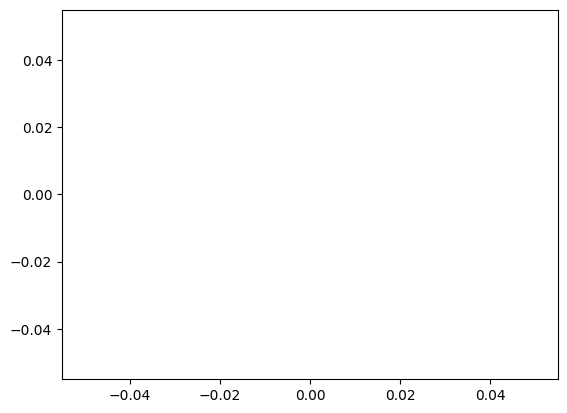

In [80]:
plt.plot(torch.tensor(lossa).view(-1,1000).mean(1))

In [102]:
torch.arange(10).view(-1,5)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [107]:
for layer in model.layers:
    layer.training=False

In [106]:
#计算loss

@torch.no_grad()
def split_loss(split):
  x,y ={
    'train':(Xtr,Ytr),
    'val':(Xdev,Ydev),
    'test':(Xte,Yte),
}[split]

  logits=model(x)
    
  loss=F.cross_entropy(logits,y)
  print(split,loss.item())

split_loss('train')
split_loss('val')

IndexError: index 27 is out of bounds for dimension 0 with size 27

In [93]:
#从模型中采样

for _ in range(20):

    out=[]
    context = [0]*block_size
    while True:
    
      logits =model(torch.tensor([context]))
      probs=F.softmax(logits,dim=1)
      ix = torch.multinomial(probs,num_samples=1).item()
      
      context=context[1:]+[ix]
      out.append(ix)

      if ix ==0:
        break
    print(''.join(itos[i] for i in out))  

RuntimeError: shape '[1, 1, 48]' is invalid for input of size 72

In [106]:
for x,y in zip(Xtr[7:15],Ytr[7:15]):
    print(''.join(itos[ix.item()]for ix in x),'-->',itos[y.item()])

红的希 --> 望
的希望 -->  
希望  --> 南
望 南 --> 方
 南方 --> 有
南方有 --> 温
方有温 --> 暖
有温暖 --> 的


In [94]:
Xtr[[7]]

tensor([[0, 0, 0]])

In [95]:
logits=model(Xtr[[7]])
logits.shape

RuntimeError: shape '[1, 1, 48]' is invalid for input of size 72

In [96]:
logits=torch.zeros(8,27)
for i in range(8):
    logits[i]=model(Xtr[7[7*i]])
logits.shape

<>:3: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<>:3: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
C:\Users\Joe\AppData\Local\Temp\ipykernel_14652\3255632850.py:3: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
  logits[i]=model(Xtr[7[7*i]])


TypeError: 'int' object is not subscriptable